<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

## Exercise 3: In/out degree of inhbitory neurons (WIP)
    
Because cortical inhibitory neuron's axons are relatively local they can be mostly contained with the mm scale dataset.  Therefore, after proofreading a large fraction of their output synaspes can be reconstructed.  Their dendrites are also contained within the volume and so their inputs are largely complete as well.  Therefore one simple question is whether the number of inputs a particular interneuron of a particular class is related to the number of outputs that cell sends locally.  

This exercise is to ask that question of the dataset, by finding the total number of synaptic inputs and outputs from individual inhibitory neurons in the dataset, and make scatter plots of the number of inputs and outputs broken down by cell type. 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Task 2.1
Using the proofread cells that are classfied as inhibitory, filter the proofread synapse table to only include ouputs from proofread inhibitory cells.  Then do the same to find the inputs to those same neurons in the dataset.  How many cells, total inputs and total outputs are there onto and from proofreading inhibitory cells?
</div>

In [16]:
inh_neurons_df = cell_type_df.query('classification_system =="aibs_coarse_inhibitory"')
inh_neurons = inh_neurons_df["pt_root_id"]
inh_neuron_out = filter_synapse_table(proof_syn_table, pre_root_ids=inh_neurons.values)
inh_neuron_in = filter_synapse_table(proof_syn_table, post_root_ids=inh_neurons.values)
print(len(inh_neurons), len(inh_neuron_out), len(inh_neuron_in))

150 417890 878632


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Task 2.2
Using group-bys and merges, construct a dataframe that contains a pt_root_id, it's total inputs, total outputs and cell type. 
    
Make a scatter plot of the number of inputs versus the number of outputs colored by cell type.  Do any cell types show a significant relationship? 
</div>

In [17]:
output_series = inh_neuron_out.groupby('pre_pt_root_id')['size'].count()
output_series.name = 'n_outputs'
input_series = inh_neuron_in.groupby('post_pt_root_id')['size'].count()
input_series.name='n_inputs'
in_out_df = pd.DataFrame([output_series, input_series]).T
in_out_df=in_out_df.merge(inh_neurons_df[['pt_root_id', 'cell_type']], left_index=True, right_on='pt_root_id')

<Axes: xlabel='n_outputs', ylabel='n_inputs'>

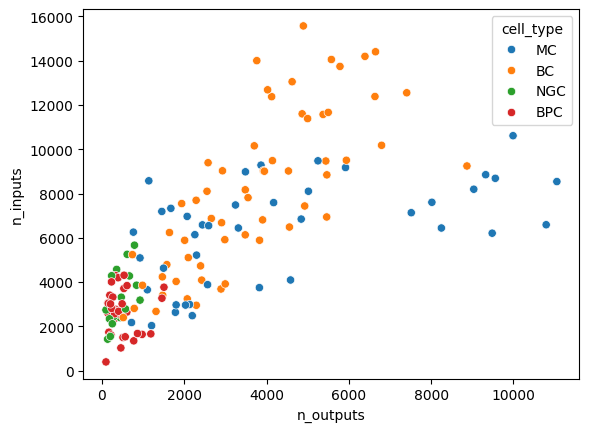

In [18]:
f, ax = plt.subplots()
sns.scatterplot(x='n_outputs', y='n_inputs', hue='cell_type',palette ='tab10', data = in_out_df)